In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../artifacts/raw/data.csv")

In [3]:
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [6]:
df.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

In [36]:
print(df["Genetic_Mutation"].value_counts())

Genetic_Mutation
No     142584
Yes     24913
Name: count, dtype: int64


In [38]:
null_val = df.isnull().sum()
null_val[null_val>0]

Series([], dtype: int64)

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.shape

(167497, 28)

In [41]:
df.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


### Visualizations

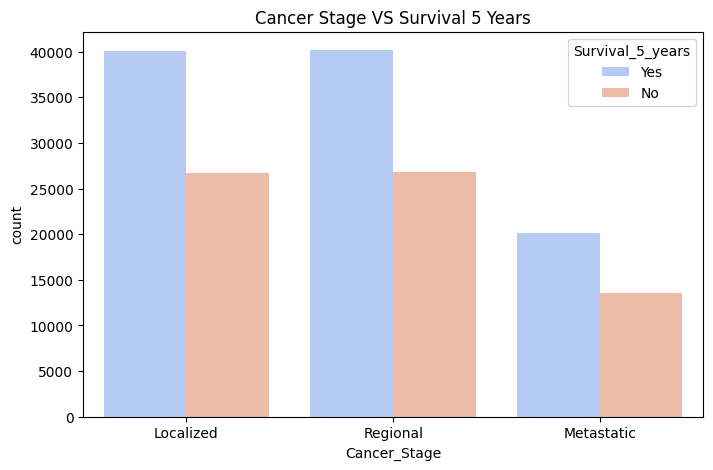

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(x="Cancer_Stage", hue="Survival_5_years", data=df, palette="coolwarm")
plt.title("Cancer Stage VS Survival 5 Years")
plt.show()

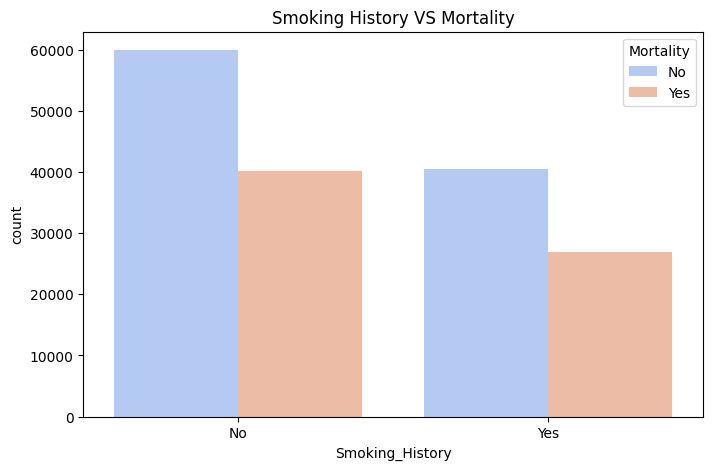

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x="Smoking_History", hue="Mortality", data=df, palette="coolwarm")
plt.title("Smoking History VS Mortality")
plt.show()

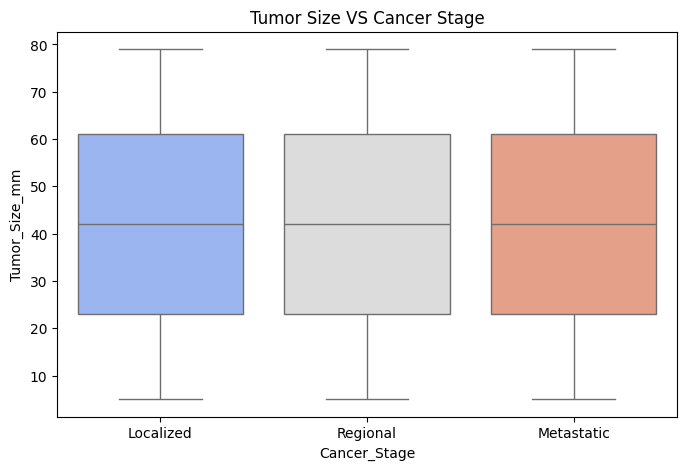

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Cancer_Stage", y="Tumor_Size_mm", hue="Cancer_Stage", legend=False, data=df, palette="coolwarm")
plt.title("Tumor Size VS Cancer Stage")
plt.show()

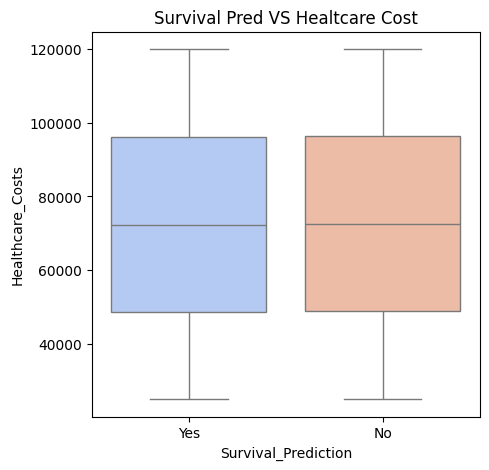

In [52]:
plt.figure(figsize=(5,5))
sns.boxplot(x = "Survival_Prediction", y="Healthcare_Costs", hue="Survival_Prediction", data=df, palette="coolwarm")
plt.title("Survival Pred VS Healtcare Cost")
plt.show()

### DATA PROCESSING

In [53]:
df = df.drop(columns=["Patient_ID"])

In [ ]:
X = df.drop(columns=["Survival_Prediction"])
y = df["Survival_Prediction"]

In [59]:
from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.feature_selection import chi2, SelectKBest

In [65]:
# CHI SQUARE TEST
X_cat = X_train.select_dtypes(include=["int64", "float64"])
chi2_selector = SelectKBest(score_func=chi2, k="all")
chi2_selector.fit(X_cat, y_train)

,score_func,<function chi...001EFDB3858A0>
,k,'all'


In [66]:
chi2_scores = pd.DataFrame({
    'feature': X_cat.columns,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by="Chi2 Score", ascending=False)

In [68]:
print(chi2_scores)

                       feature   Chi2 Score
19            Healthcare_Costs  2097.430133
4                Tumor_Size_mm     7.971461
16              Treatment_Type     4.987144
11                    Diabetes     2.103967
21     Mortality_Rate_per_100K     1.963077
25            Insurance_Status     1.464241
3                 Cancer_Stage     1.281849
14           Screening_History     1.159519
0                      Country     0.883425
24           Healthcare_Access     0.713346
1                          Age     0.679739
17            Survival_5_years     0.545494
9                    Diet_Risk     0.445386
23     Economic_Classification     0.381835
22              Urban_or_Rural     0.355363
6              Smoking_History     0.280786
7          Alcohol_Consumption     0.209884
20     Incidence_Rate_per_100K     0.208835
8                  Obesity_BMI     0.151591
5               Family_History     0.095201
15             Early_Detection     0.063440
18                   Mortality  

In [70]:
top_features = chi2_scores.head(5)['feature'].to_list()

In [71]:
X = X[top_features]

### Model Building

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [81]:
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [82]:
y_pred = gb.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5995223880597015


In [87]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          No       0.44      0.00      0.00     13412
         Yes       0.60      1.00      0.75     20088

    accuracy                           0.60     33500
   macro avg       0.52      0.50      0.38     33500
weighted avg       0.54      0.60      0.45     33500



In [89]:
y_proba = gb.predict_proba(X_test)[:, 1] if len(y.unique()) == 2 else None

In [90]:
roc_auc_score(y_test, y_proba)

0.49967731082550826

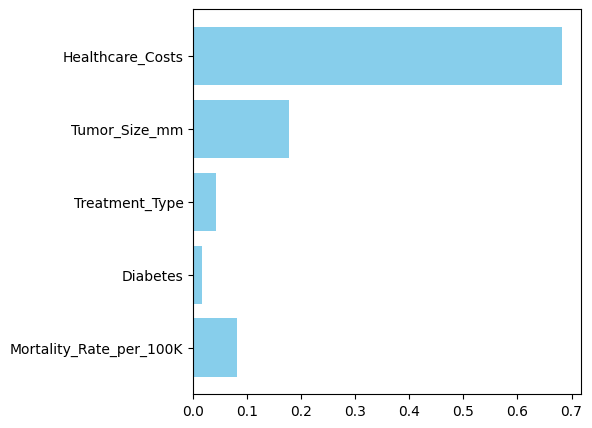

In [91]:
plt.figure(figsize=(5, 5))
plt.barh(top_features, gb.feature_importances_, color="skyblue")
plt.gca().invert_yaxis()
plt.show()

### TESTING

In [96]:
test_array = np.array([0,0,0,0,0]).reshape(1, -1)

In [97]:
gb.predict(test_array)

array(['Yes'], dtype=object)